___
# Лабораторна робота №3 [Unsupervised learning]
___

Виконала:
студентка III курсу
групи ДА-01
**Хмиз Єлизавета Русланівна**

## Мета
Навчитись робити передобробку даних та використовувати інструменти для кластеризації.

## Завдання
1.	Прочитати опис та викачати дані з Kaggle змагання https://www.kaggle.com/c/titanic/data . 
2.	Обробити дані для подальшого використання у кластеризації (вирішити проблему з missing data, закодувати змінні).
3.	Провести кластеризацію даних за допомогою алгоритмів кластеризації з різними параметрами.
4.	Візуалізувати та оформити результати.

## Хід роботи

<br/>

___
### Імпорт модулів
___

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

<br/>

___
### Завантаження даних
___

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

<br/>

---
### Огляд даних
---

Визначимо розмір та виведемо 10 випадкових рядків кожного датасету:

#### TRAIN

In [3]:
data_train.shape

(891, 12)

In [4]:
data_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S
812,813,0,2,"Slemen, Mr. Richard James",male,35.0,0,0,28206,10.5000,NaN,S
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,NaN,Q
602,603,0,1,"Harrington, Mr. Charles H",male,NaN,0,0,113796,42.4000,NaN,S


<br/>

#### TEST

In [5]:
data_test.shape

(418, 11)

In [6]:
data_test.sample(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
176,1068,2,"Sincock, Miss. Maude",female,20.0,0,0,C.A. 33112,36.7500,NaN,S
121,1013,3,"Kiernan, Mr. John",male,NaN,1,0,367227,7.7500,NaN,Q
323,1215,1,"Rowe, Mr. Alfred G",male,33.0,0,0,113790,26.5500,NaN,S
297,1189,3,"Samaan, Mr. Hanna",male,NaN,2,0,2662,21.6792,NaN,C
288,1180,3,"Mardirosian, Mr. Sarkis",male,NaN,0,0,2655,7.2292,F E46,C
68,960,1,"Tucker, Mr. Gilbert Milligan Jr",male,31.0,0,0,2543,28.5375,C53,C
158,1050,1,"Borebank, Mr. John James",male,42.0,0,0,110489,26.5500,D22,S
129,1021,3,"Petersen, Mr. Marius",male,24.0,0,0,342441,8.0500,NaN,S
47,939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q
388,1280,3,"Canavan, Mr. Patrick",male,21.0,0,0,364858,7.7500,NaN,Q


<br/>

Проаналізувавши датасети, можна сказати, що стовпці "Name", "PassengerID", "Ticket" та "Cabin" містять унікальні значення для кожного пасажира та наврядчи матимуть суттєвий вплив на результат кластеризації. Видалимо дані стовпці з обох датасетів:

In [7]:
data_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1, inplace=True)
data_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

<br/>

---
### Відсутні значення
---

Реалізуємо функцію визначення кількості відсутніх значень у кожному стовпці у спадаючому порядку:

In [8]:
def missing_values_info(data):
    res = pd.DataFrame((data.isnull().sum()).sort_values(ascending=False))
    res.columns = ['PERCENT_OF_MISSING_VALUES']
    return res

Встановимо, чи наявні відсутні значення і якщо так, виведемо їх кількість у кожному стовпці:

#### TRAIN

In [9]:
missing_values_info(data_train)

,PERCENT_OF_MISSING_VALUES
Age,177
Embarked,2
Pclass,0
Sex,0
SibSp,0
Parch,0
Fare,0


#### TEST

In [10]:
missing_values_info(data_test)

,PERCENT_OF_MISSING_VALUES
Age,86
Fare,1
Pclass,0
Sex,0
SibSp,0
Parch,0
Embarked,0


Відсутні значення наявні, заповнимо їх:

In [11]:
data_train['Age'].fillna(data_train['Age'].median(), inplace=True)
data_test['Age'].fillna(data_test['Age'].median(), inplace=True)

data_test['Fare'].fillna(data_test['Fare'].median(), inplace=True)

data_train['Embarked'].fillna(data_train['Embarked'].mode()[0], inplace=True)
data_test['Embarked'].fillna(data_test['Embarked'].mode()[0], inplace=True)

Переконаємося, що відсутні значення заповнено:

#### TRAIN

In [12]:
missing_values_info(data_train)

,PERCENT_OF_MISSING_VALUES
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


#### TEST

In [13]:
missing_values_info(data_test)

,PERCENT_OF_MISSING_VALUES
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


---
### Обробка типів змінних
---

Визначимо типи змінних датасетів:

#### TRAIN

In [14]:
data_train.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

#### TEST

In [15]:
data_test.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Закодуємо категоріальні змінні в числові значення. Для категоріальних змінних з 2 унікальними категоріями (Sex) використаємо label кодування, з більш ніж 2 унікальними категоріями (Emarked) – one-hot кодування:

In [16]:
le = LabelEncoder()
data_train["Sex"]= le.fit_transform(data_train["Sex"])
data_test["Sex"]= le.transform(data_test["Sex"])

data_train = pd.get_dummies(data_train, columns=['Embarked'])
data_test = pd.get_dummies(data_test, columns=['Embarked'])

---
### Кластеризація
---

Використовуючи різну кількість кластерів проведемо кластеризацію даних за допомогою алгоритмів кластеризації.

* KMEANS
	
    Даний алгоритм ділить набір даних на k кластерів. Основна ідея полягає в тому, щоб ітеративно групувати точки даних разом таким чином, щоб мінімізувати суму квадратів відстаней між точками даних і призначеними центроїдами кластера.


* Agglomerative

	Цей алгоритм відноситься до сімейства ієрархічних кластерних алгоритмів, де об'єкти групуються в підмножини (кластери) на основі схожості між ними.
	Алгоритм починає роботу з того, що кожен об'єкт сприймається як окремий кластер. Потім він послідовно об'єднує найближчі кластери, поки не досягне заданого критерію зупинки.


* Gaussian Mixture Model (GMM)

	Це статистична модель, яка вважає, що дані в кожному кластері розподілені за допомогою кількох гаусівських розподілів. Таким чином, алгоритм моделює кожен кластер як суму декількох гаусівських розподілів.


<br/>

In [17]:
def clustering_algo(choice, n_clusters, x_train_pca, x_test_pca):
    model = None
    y_pred_train = None
    y_pred_test = None
    
    if choice == 'KMEANS':
        model = KMeans(n_clusters=n_clusters, random_state=42)
        model.fit(x_train_pca)
        y_pred_train = model.predict(x_train_pca)
        y_pred_test = model.predict(x_test_pca)
    
    elif choice == 'AGGLOMERATIVE':
        model = AgglomerativeClustering(n_clusters=n_clusters)
        model.fit(x_train_pca)
        y_pred_train = model.labels_
        y_pred_test = model.fit_predict(x_test_pca)
    
    elif choice == 'GAUSSIAN_MIXTURE':
        model = GaussianMixture(n_components=n_clusters, random_state=42)
        model.fit(x_train_pca)
        y_pred_train = model.predict(x_train_pca)
        y_pred_test = model.predict(x_test_pca)
    
    else:
        print('incorrect choice of model')
        
    return y_pred_train, y_pred_test

<br/>

Для перевірки ефективності моделей, реалізуємо візуалізацію кластерів, а також оцінимо *silhouette score*. *silhouette score* - це показник, який вимірює наскільки добре кожна точка даних вписується в призначений їй кластер. Оцінка, ближча до 1, вказує на те, що точка даних добре відповідає своєму кластеру, а оцінка, ближча до -1, вказує на те, що точка даних може краще підходити до іншого кластера.

Крім того, проаналізуємо алгоритми на різній кількості кластерів та виведемо графіки залежності оцінки *silhouette score* від кількості кластерів.

<br/>

In [18]:
def clustering(model):
    
    pca = PCA(n_components=2)
    x_train_pca = pca.fit_transform(data_train)
    x_test_pca = pca.transform(data_test)
    train_scores = []
    test_scores = []

    fig, axes = plt.subplots(nrows=2, ncols=9, figsize=(25, 10))
    axes = axes.flatten()

    for n_clusters in range(2, 11):
        y_pred_train, y_pred_test = clustering_algo(model, n_clusters, x_train_pca, x_test_pca)

        train_score = silhouette_score(x_train_pca, y_pred_train)
        test_score = silhouette_score(x_test_pca, y_pred_test)

        train_scores.append(train_score)
        test_scores.append(test_score)

        ax = axes[n_clusters - 2]
        ax.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_pred_train, s=50, cmap='viridis')
        ax.set_title(f'{n_clusters} clusters\n'
              f'train silhouette score: {train_score:.2f}\n'
              f'test silhouette score: {test_score:.2f}\n'
              f'\n'
              f'train')

        ax = axes[n_clusters + 7]
        ax.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_pred_test, s=50, cmap='viridis')
        ax.set_title(f'test')

    print(f'\n\n {model} clustering\n') 
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(6, 4))
    plt.plot(range(2, 11), train_scores, 'o-', color='#008080', label='train')
    plt.plot(range(2, 11), test_scores, 'o-', color='purple', label='test')
    plt.xlabel('number of clusters')
    plt.ylabel('silhouette score')
    plt.legend()
    plt.show()

<br/>

#### K-MEANS Clustering



 KMEANS clustering



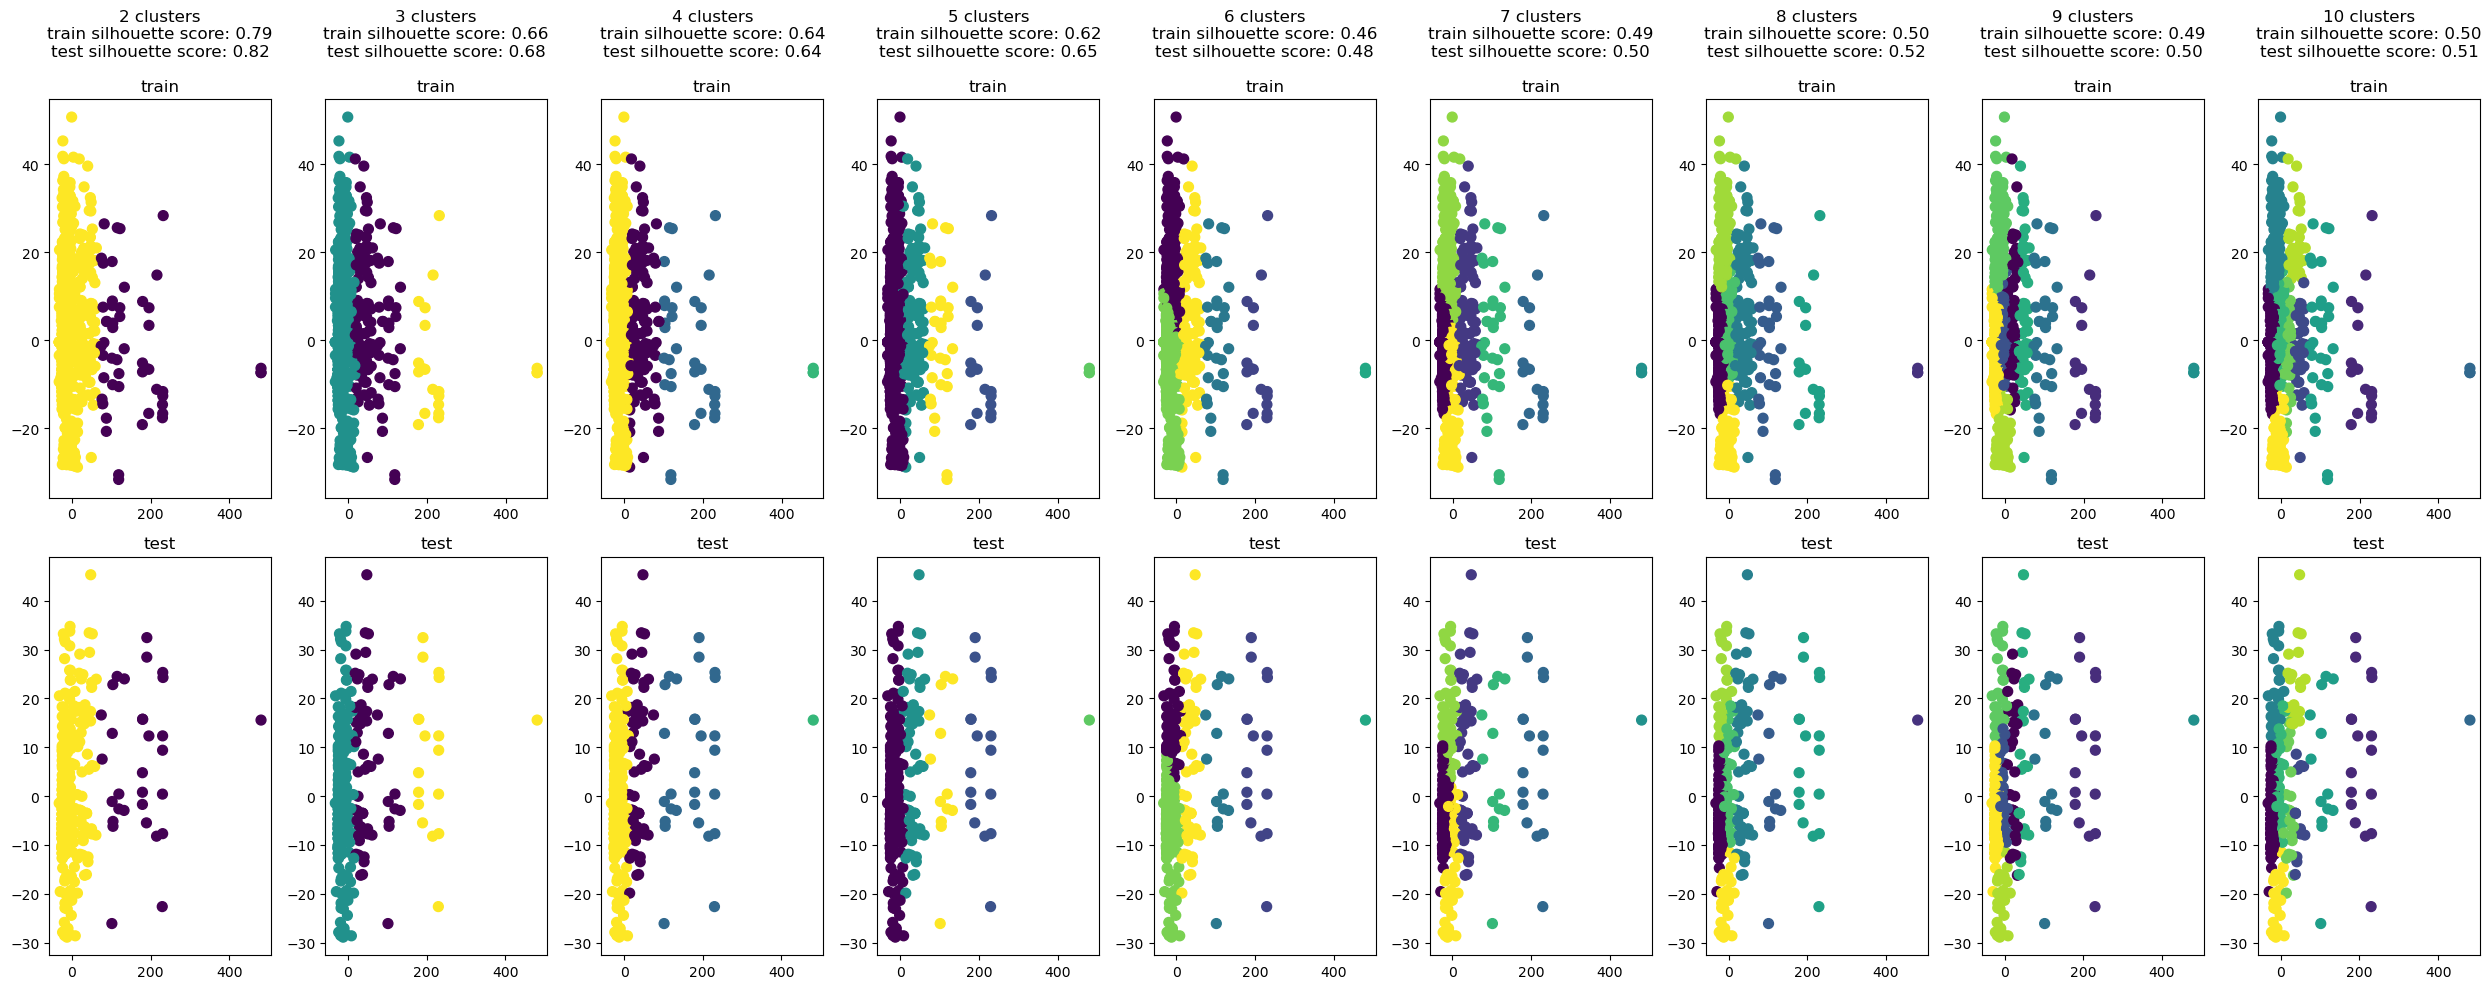

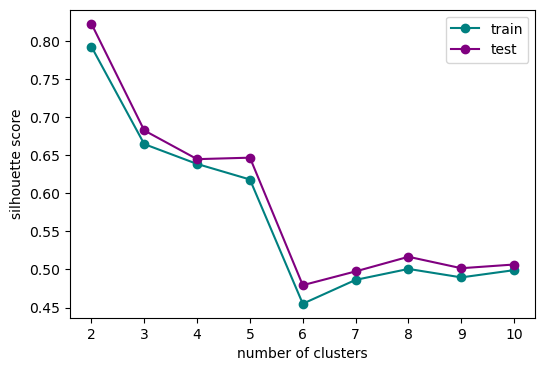

In [19]:
clustering('KMEANS')

#### Agglomerative Clustering



 AGGLOMERATIVE clustering



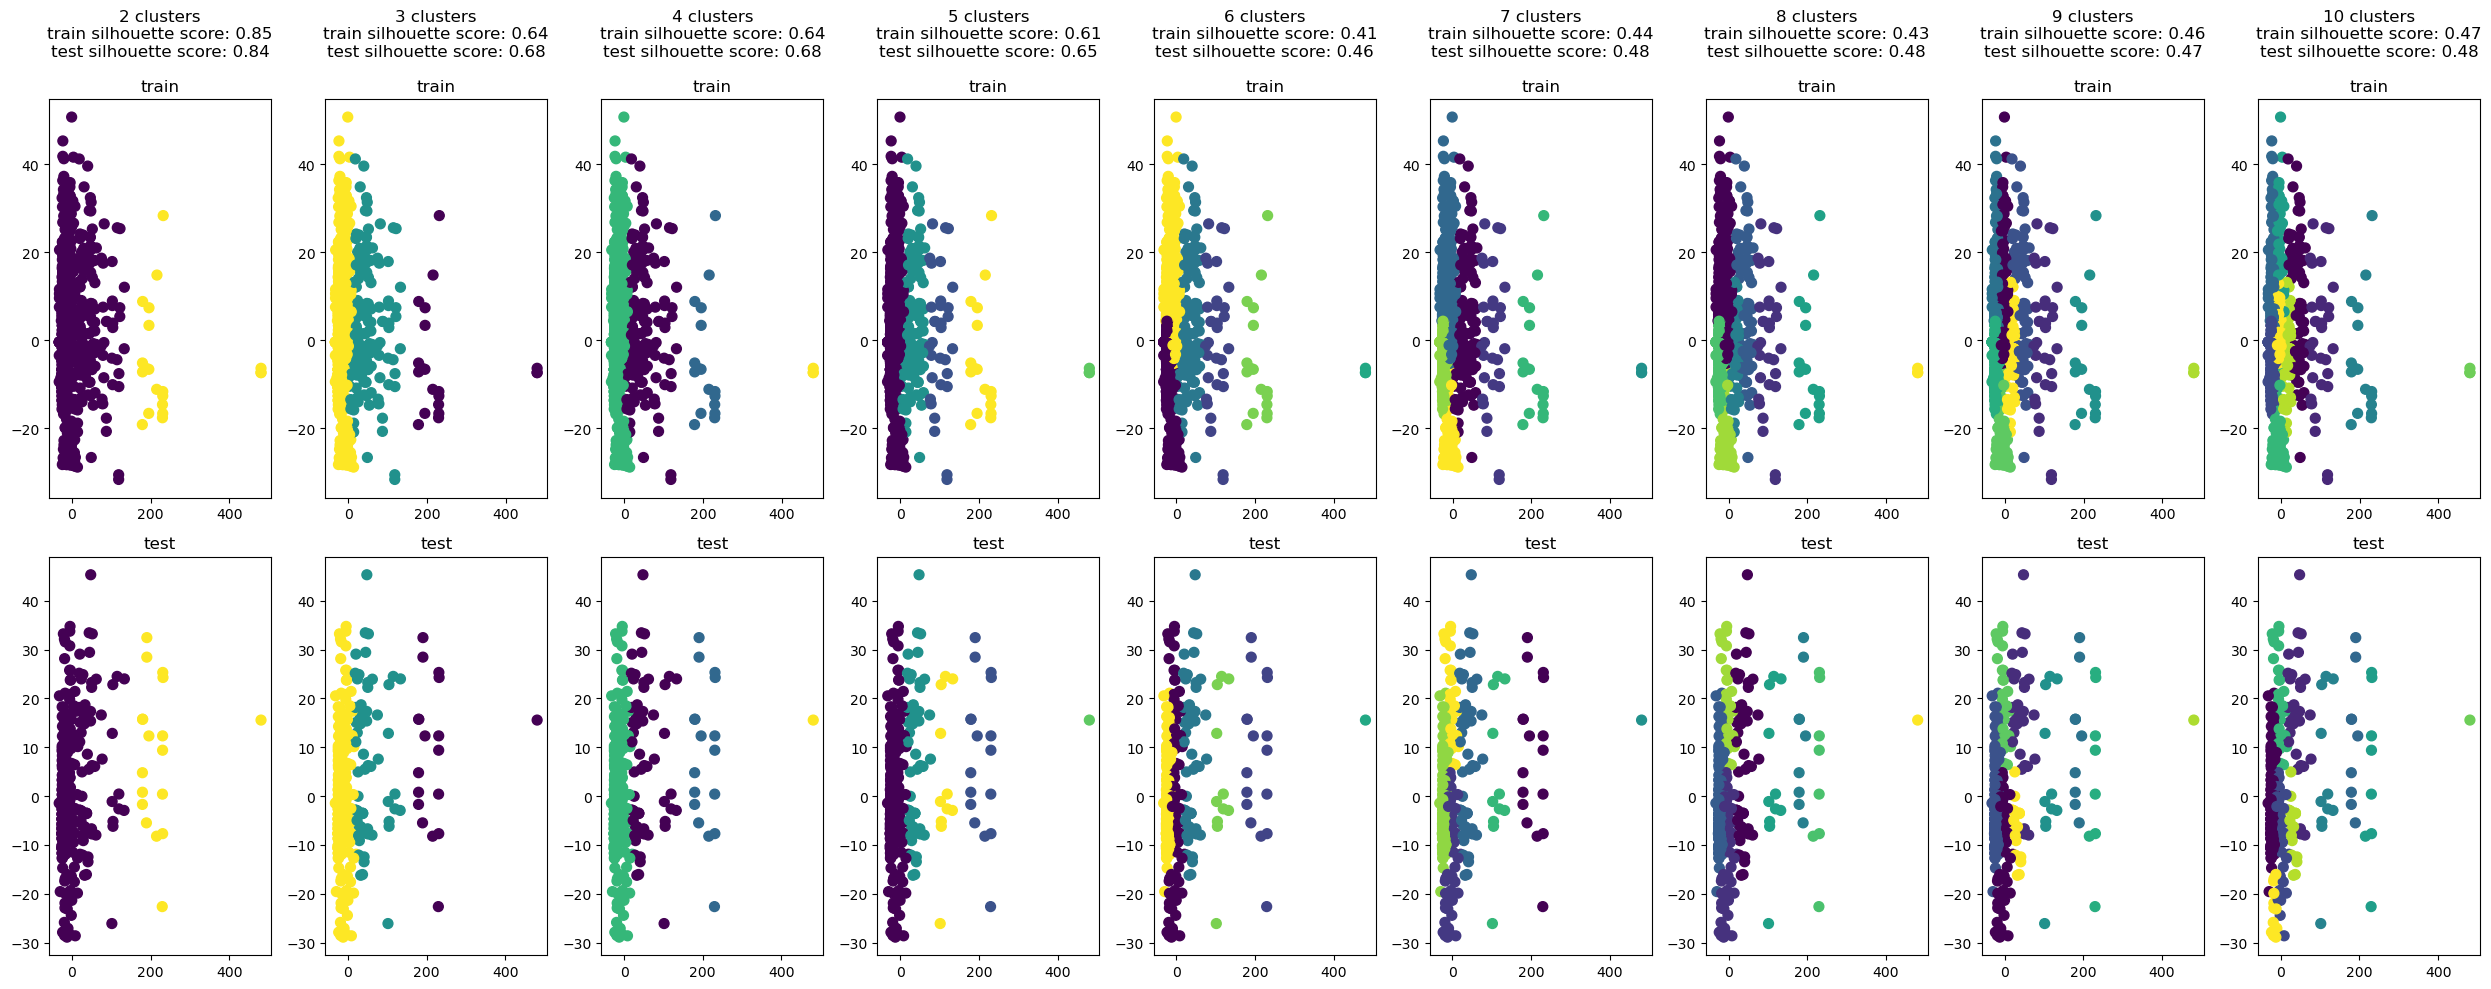

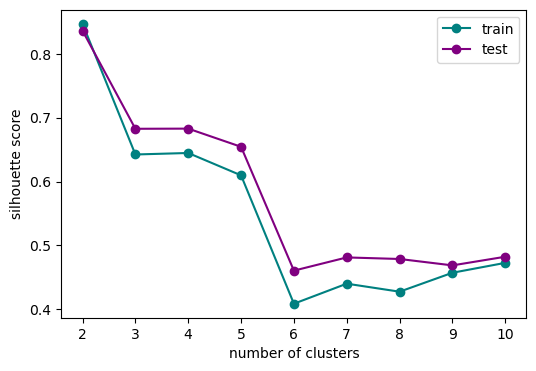

In [20]:
clustering('AGGLOMERATIVE')

#### Gaussian Mixture Model (GMM) Clustering



 GAUSSIAN_MIXTURE clustering



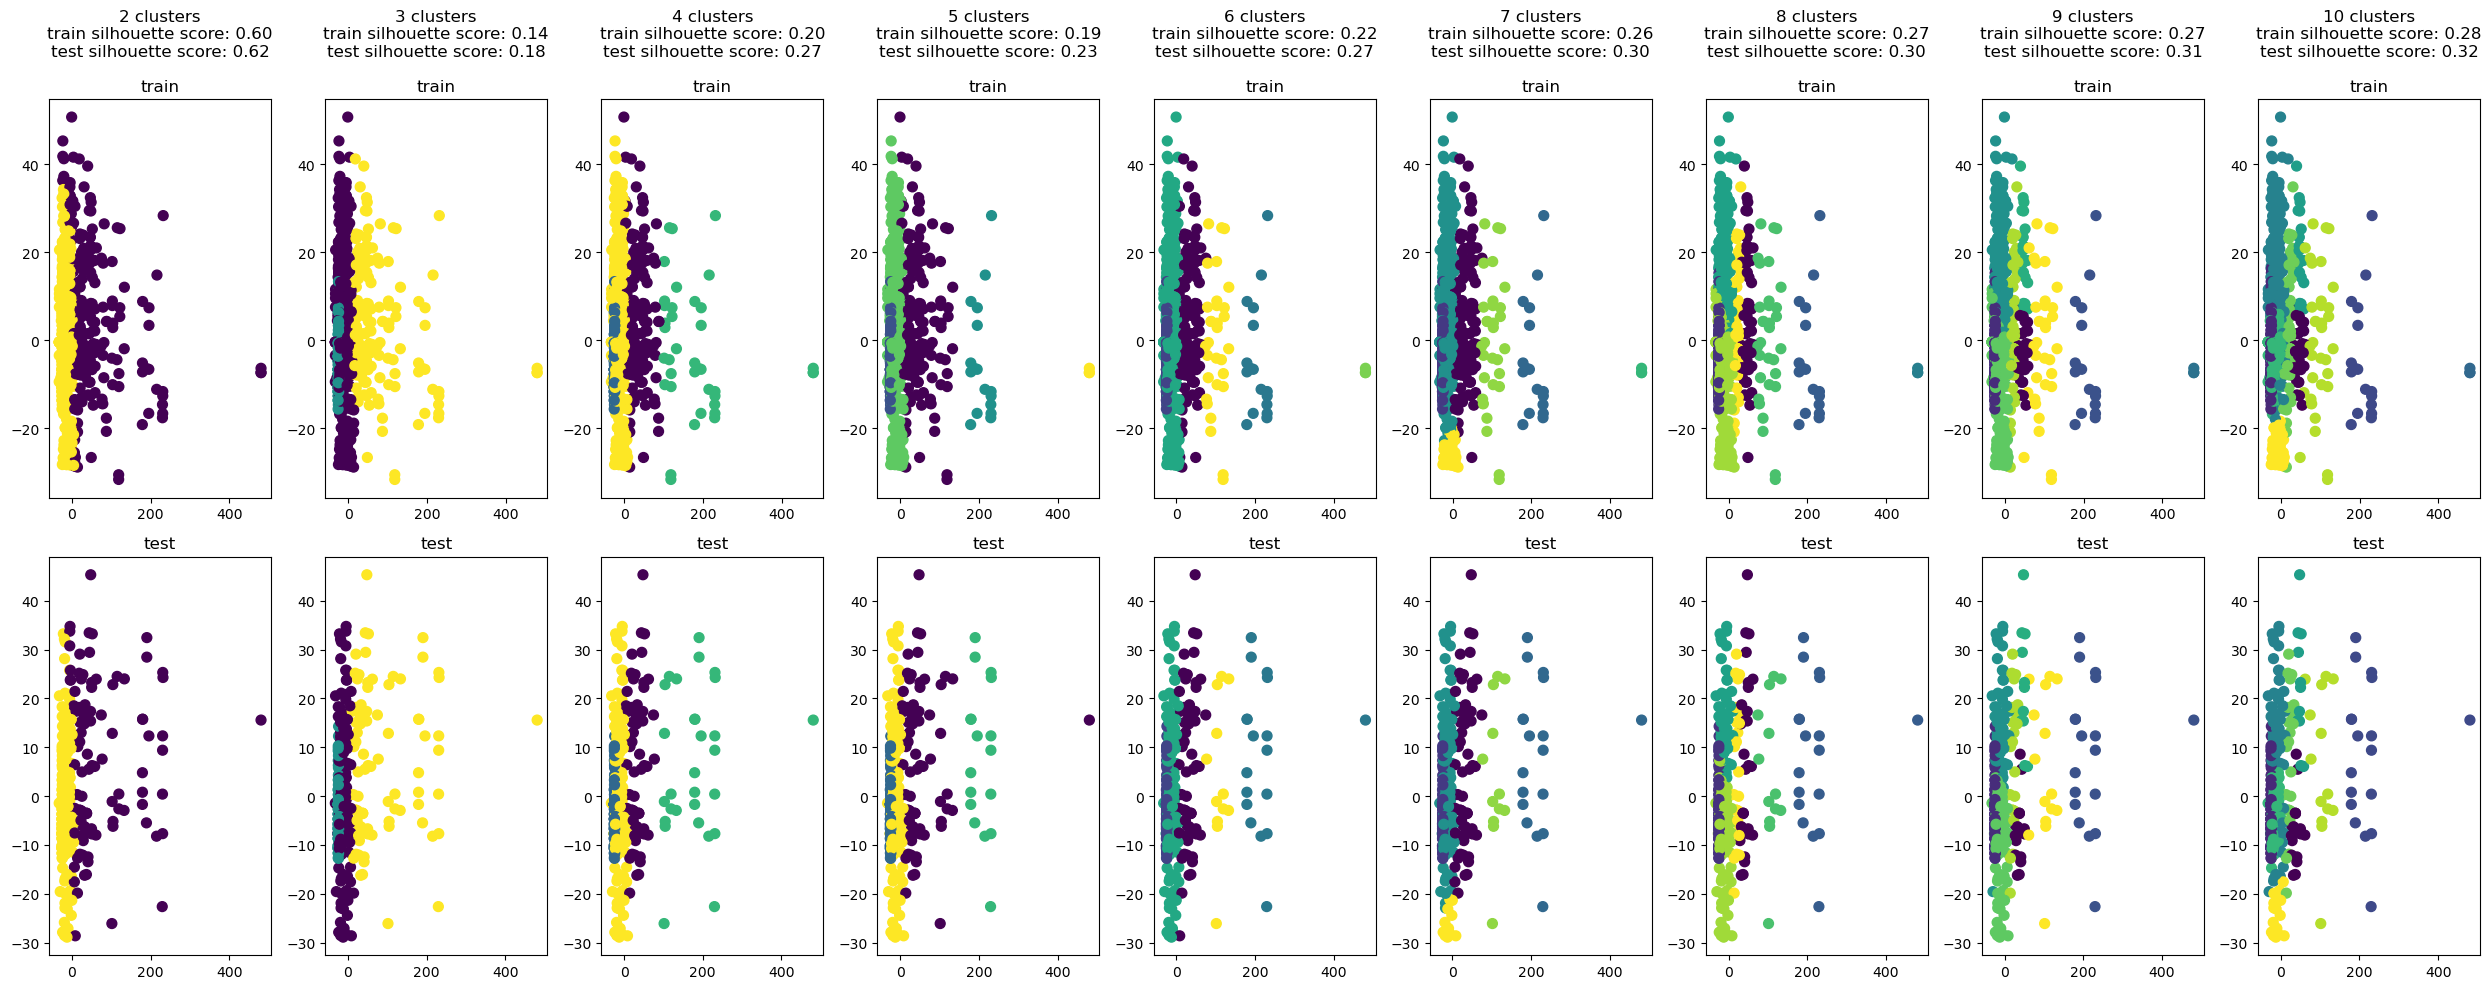

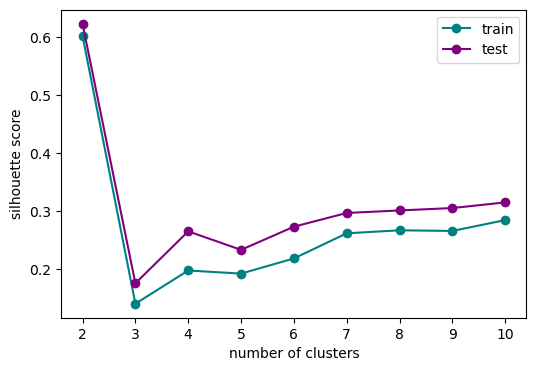

In [21]:
clustering('GAUSSIAN_MIXTURE')

<br/>

Виходячи з отриманих результатів, можна сказати, що оптимальна кількість кластерів залежить як від властивостей даних, так і від алгоритму кластеризації, що використовується. 
<br/>
Для алгоритмів KMEANS та AGGLOMERATIVE висока оцінка *silhouette score* спостерігалася при 2-5 кластерах, для алгоритму GAUSSIAN MIXTURE - при 2. Найвищу оцінку було досягнуто з 2 кластерами при використанні алгоритму AGGLOMERATIVE.
<br/>
Отже, неправильно визначена кількість кластерів може призвести до неправильної інтерпретації результатів та зниження ефективності кластеризації. Наприклад, якщо кількість кластерів занадто велика, може виникнути проблема перенавчання, коли кожен об'єкт може бути розподілений до окремого кластеру, що знижує значення кластеризації. З іншого боку, якщо кількість кластерів занадто мала, можуть бути втрачені важливі дані та залежності між ними.

<br/>